<a href="https://colab.research.google.com/github/i8dacake/Mat-421/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

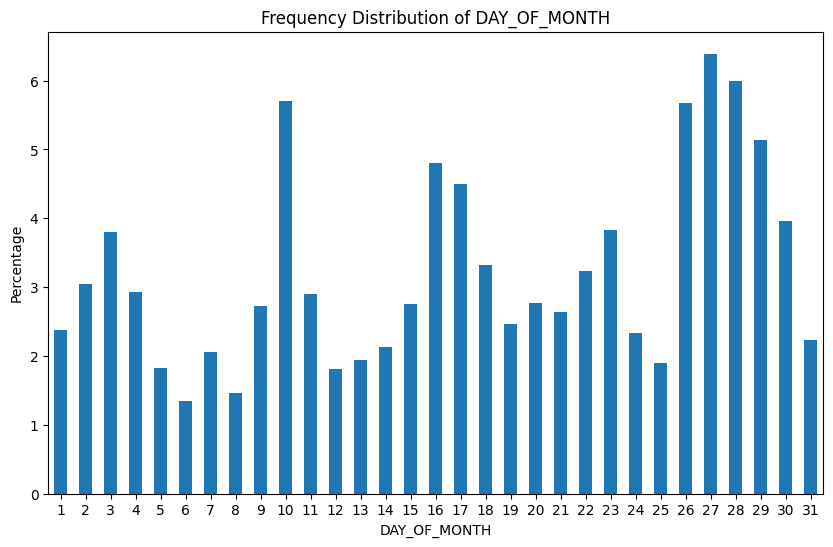

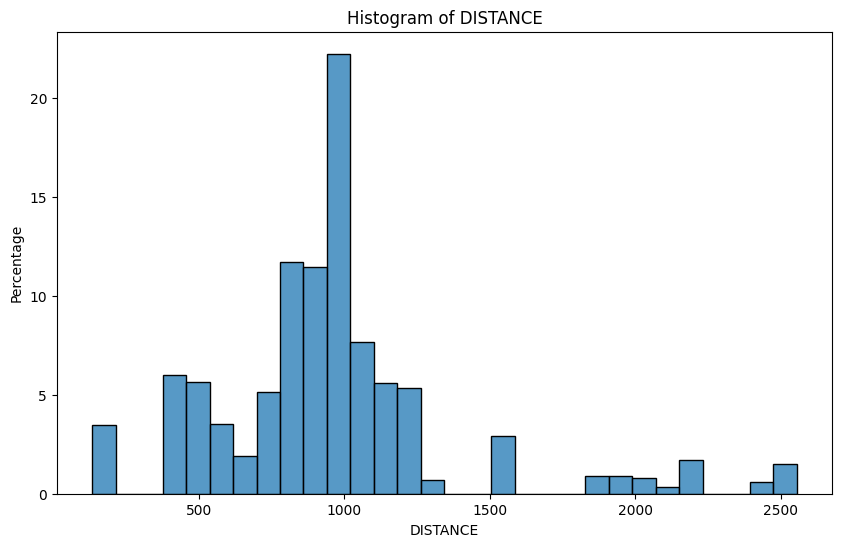

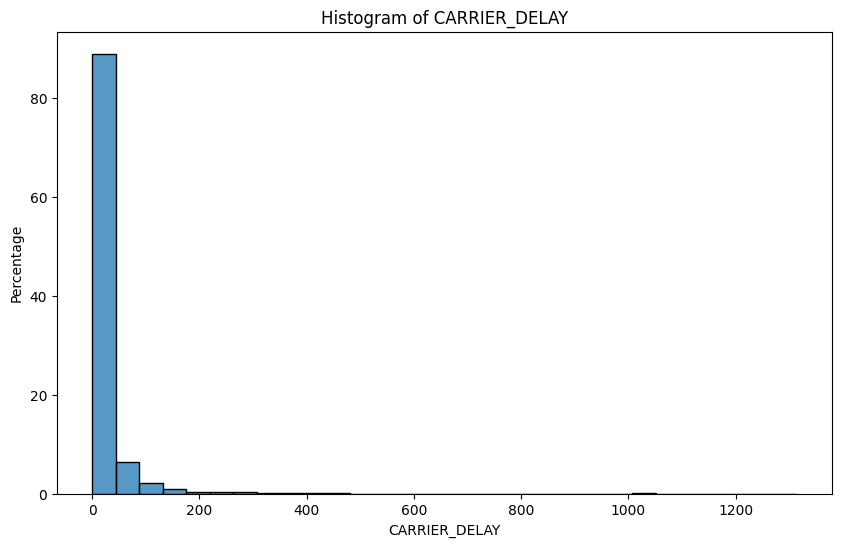

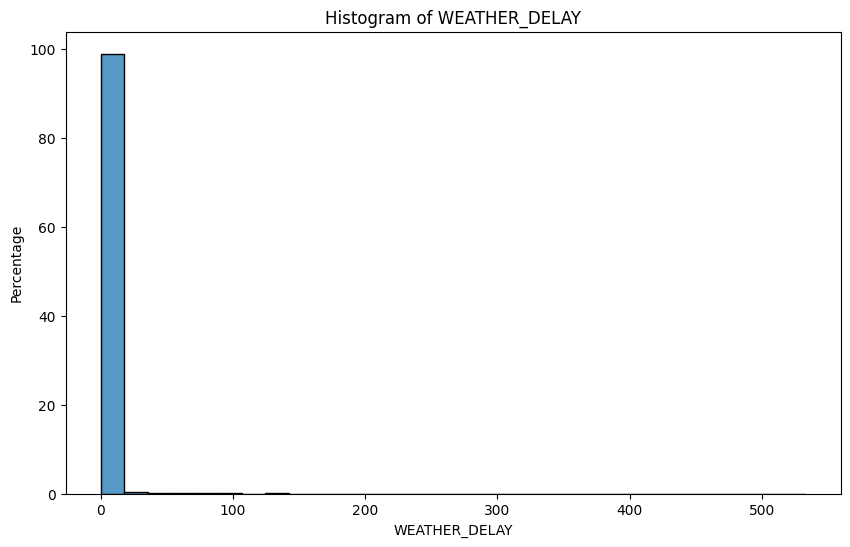

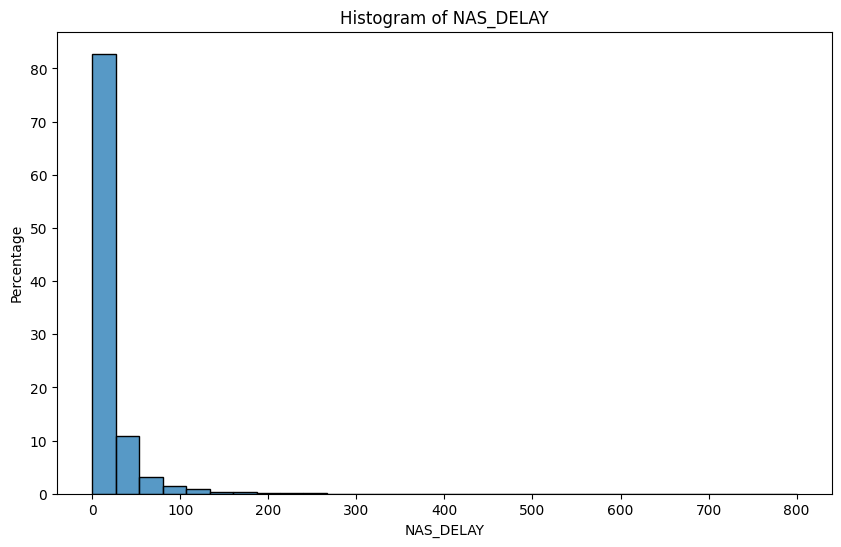

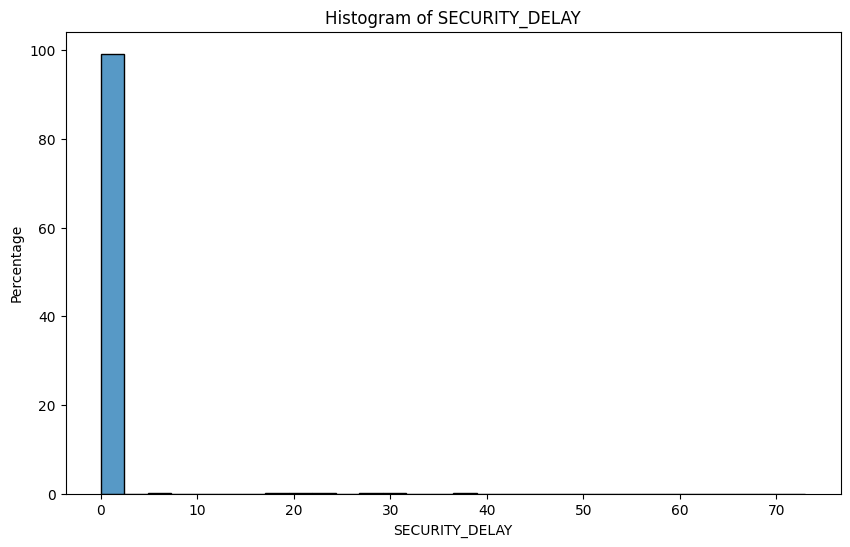

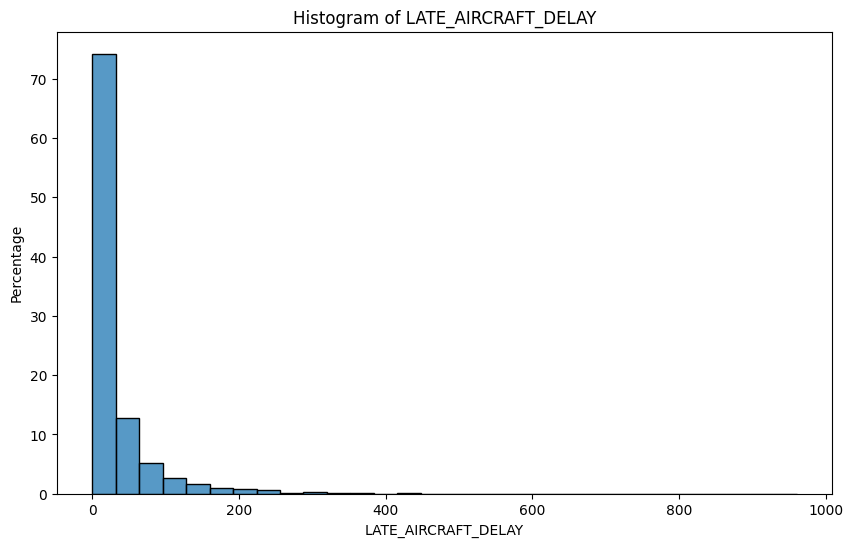

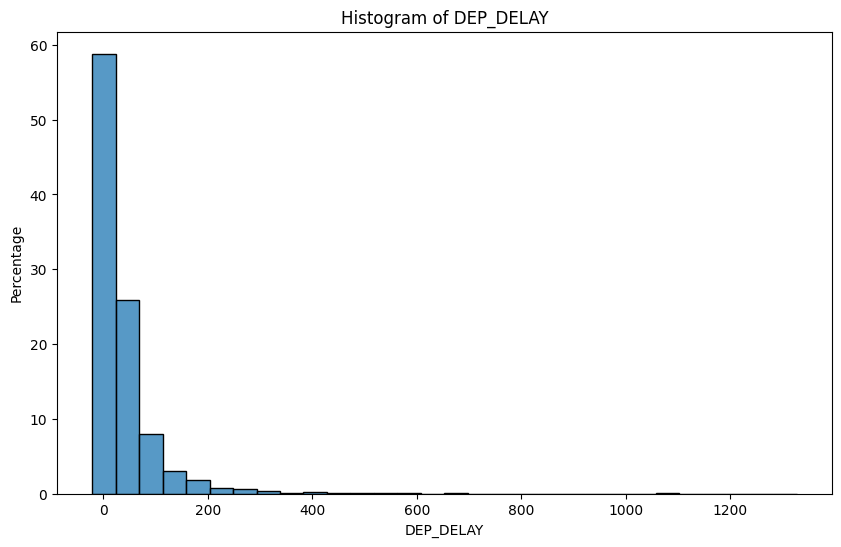

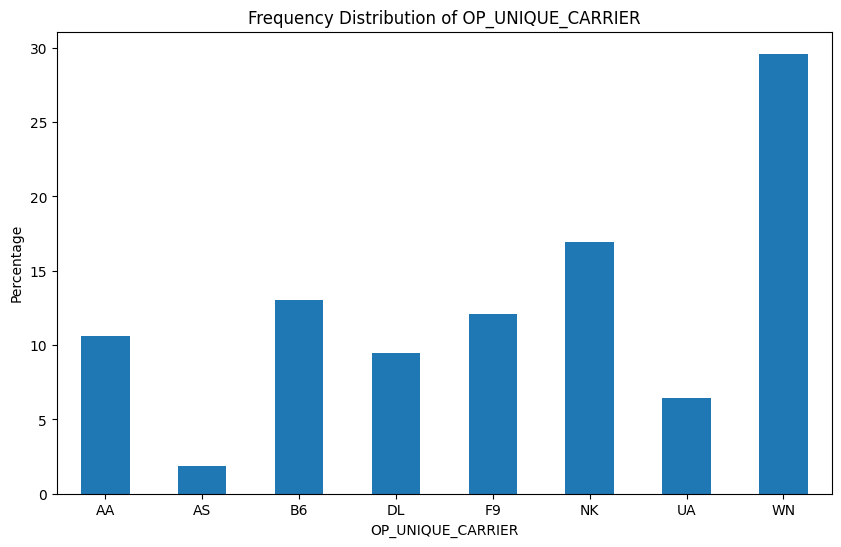

DAY_OF_MONTH:- r =  0.032204145223914196, p-value: 0.011981856329310715
DISTANCE:- r =  -0.030194488115586404, p-value: 0.018482669233389624
CARRIER_DELAY:- r =  0.6777257928421664, p-value: 0.0
WEATHER_DELAY:- r =  0.1376759113456167, p-value: 1.1497870444391513e-15
NAS_DELAY:- r =  0.17490698971438084, p-value: 1.8635735104974602e-24
SECURITY_DELAY:- r =  -0.0014028031019648185, p-value: 0.9352642664145783
LATE_AIRCRAFT_DELAY:- r =  0.5928183356281698, p-value: 1.281393e-317
DEP_DELAY:- r =  0.9767056068894101, p-value: 0.0


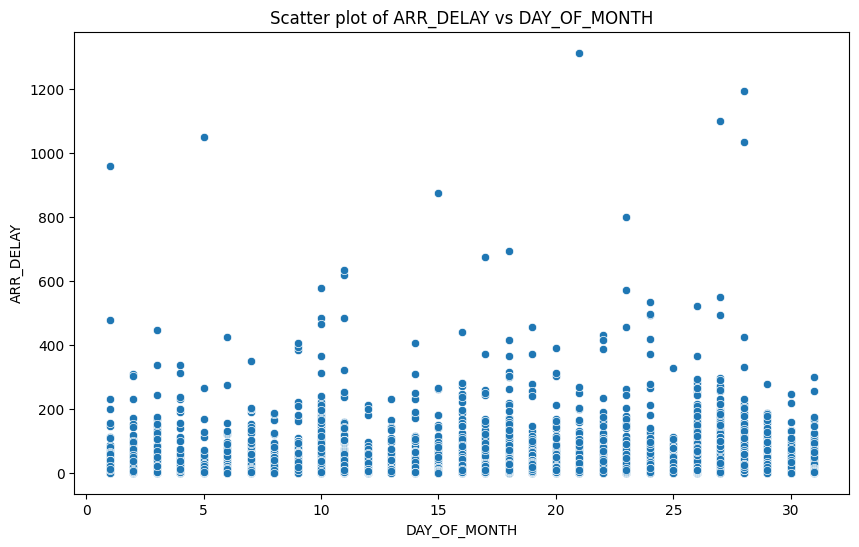

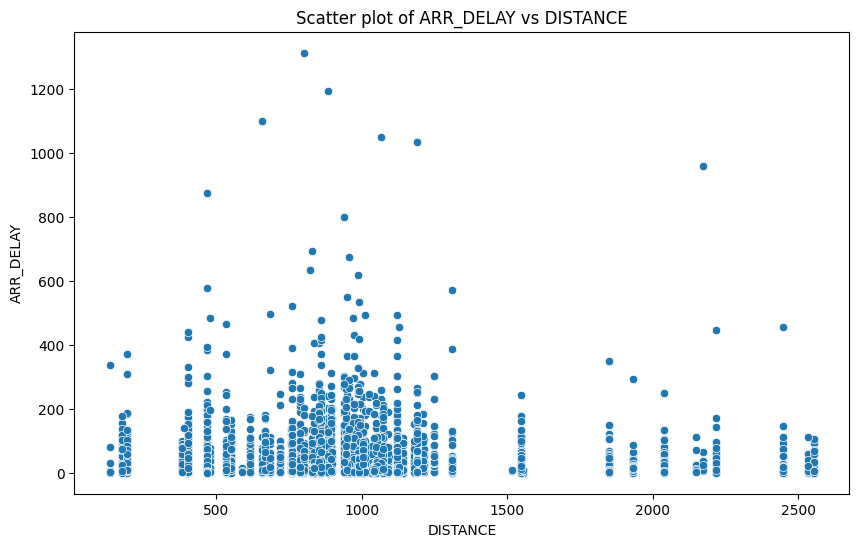

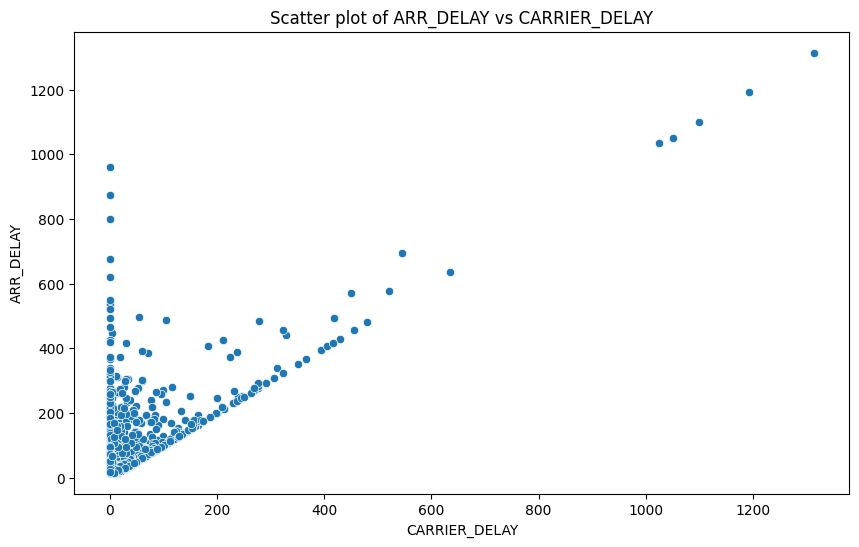

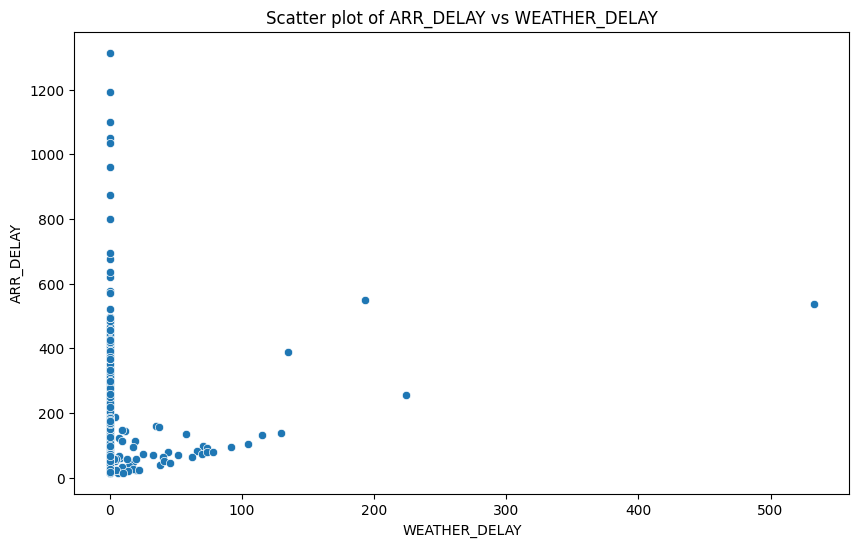

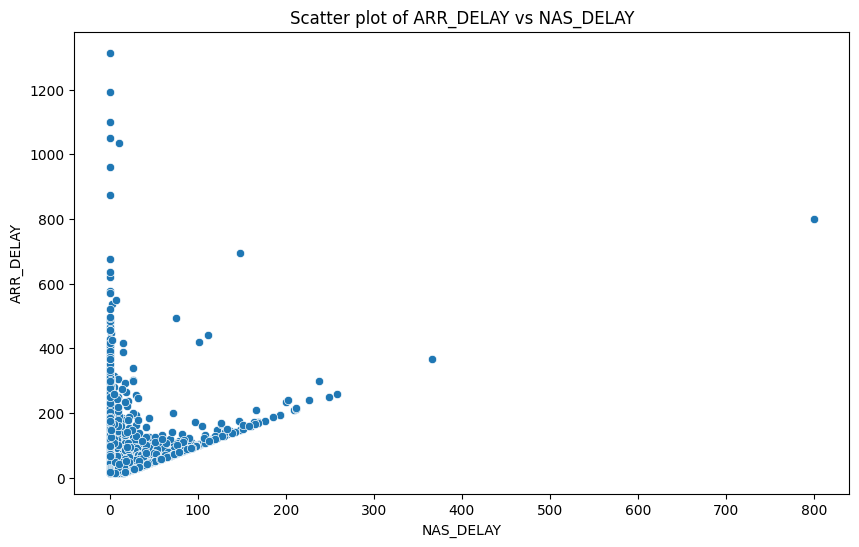

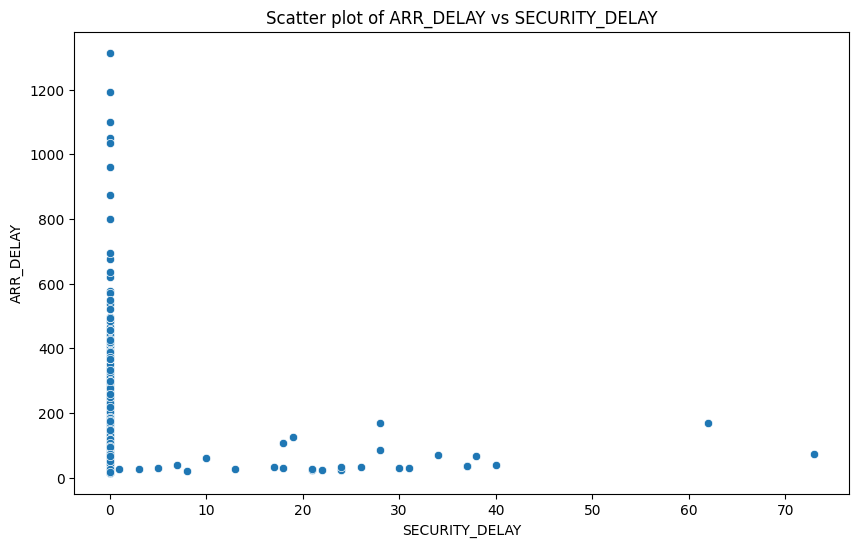

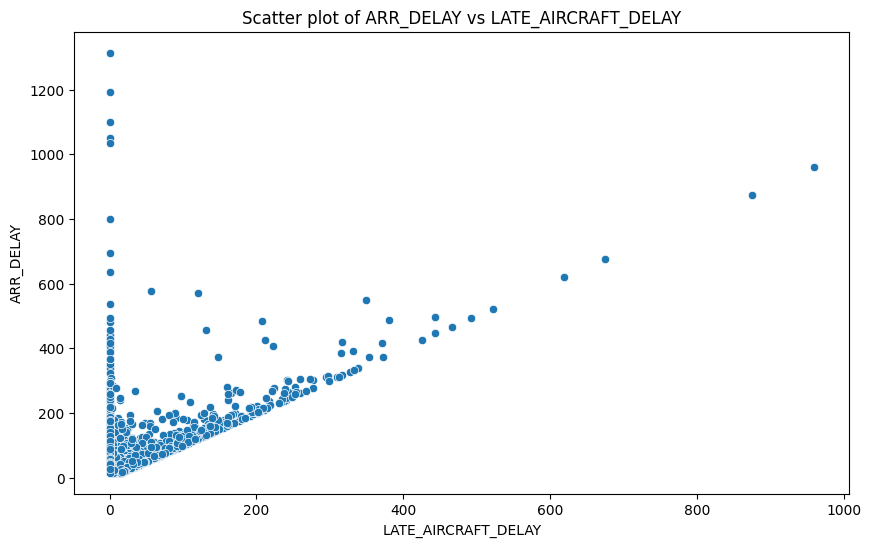

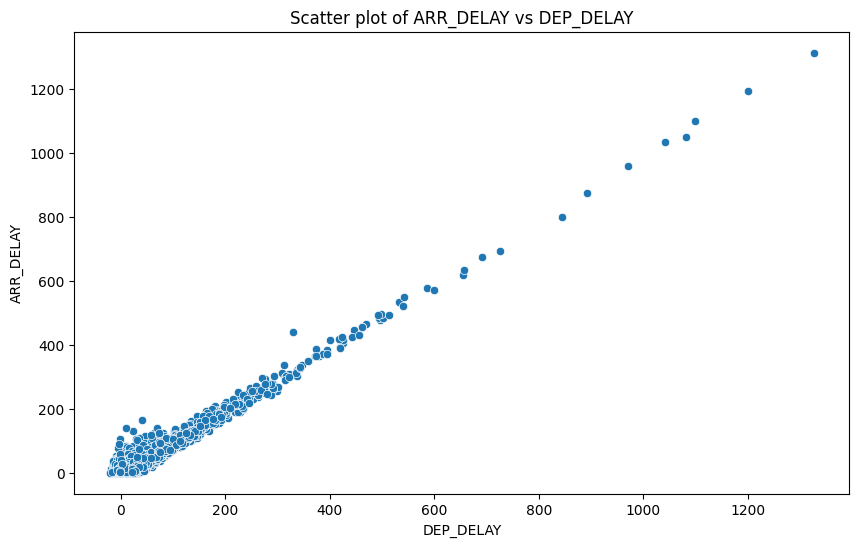

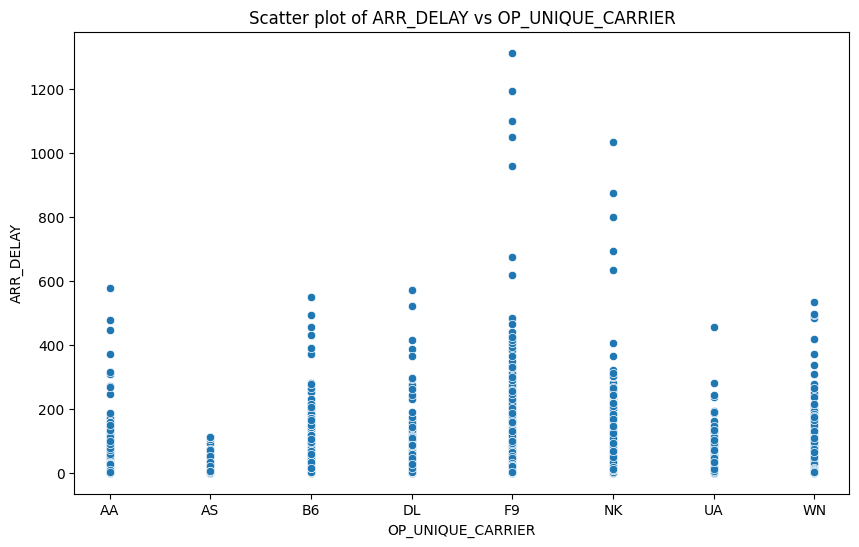

                            OLS Regression Results                            
Dep. Variable:              ARR_DELAY   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.261e+05
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:02:08   Log-Likelihood:                -25005.
No. Observations:                6087   AIC:                         5.001e+04
Df Residuals:                    6085   BIC:                         5.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2500      0.212     20.043      0.0

(array([2.150e+02, 1.762e+03, 2.898e+03, 9.710e+02, 1.790e+02, 4.000e+01,
        1.500e+01, 2.000e+00, 2.000e+00, 3.000e+00]),
 array([-40.53027847, -23.66261107,  -6.79494368,  10.07272371,
         26.9403911 ,  43.8080585 ,  60.67572589,  77.54339328,
         94.41106068, 111.27872807, 128.14639546]),
 <BarContainer object of 10 artists>)

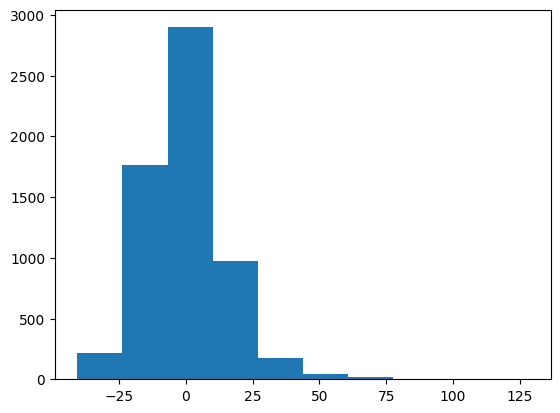

In [96]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import statsmodels.api as sm

# Loading data
data = pd.read_csv('T_ONTIME_REPORTING.csv')

# Flights where destination is set to 'MCO' and arrival delay > 0
flights = data[(data['DEST'] == 'MCO') & (data['ARR_DELAY'] > 0)]

# Creating frequency distributions
def freq(data, column):
    freq = data[column].value_counts(normalize=True).sort_index() * 100
    plt.figure(figsize = (10, 6))
    freq.plot(kind = 'bar')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation = 0)
    plt.show()

# Creating histograms
def hist(data, column):
    plt.figure(figsize = (10, 6))
    sns.histplot(data[column], bins = 30, kde = False, stat = 'percent')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.show()

# Frequency distribution of Day of Month
freq(flights, 'DAY_OF_MONTH')

# Histogram of Distance
hist(flights, 'DISTANCE')

# Histogram of Carrier Delay
hist(flights, 'CARRIER_DELAY')

# Histogram of Weather Delay
hist(flights, 'WEATHER_DELAY')

# Histogram of NAS Delay
hist(flights, 'NAS_DELAY')

# Histogram of Security Delay
hist(flights, 'SECURITY_DELAY')

# Histogram of Late Aircraft Delay
hist(flights, 'LATE_AIRCRAFT_DELAY')

# Histogram of Departure Delay
hist(flights, 'DEP_DELAY')

# Frequency distribution of Unique Carrier
freq(flights, 'OP_UNIQUE_CARRIER')

# Generating the P-value for the Pearson Correlation Coefficients
import pandas as pd
from scipy.stats import pearsonr

explanatory_vars = ['DAY_OF_MONTH', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
                    'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DEP_DELAY']
pearson_results = {}
for variable in explanatory_vars:
    flights2 = flights[np.isfinite(flights[variable]) & np.isfinite(flights['ARR_DELAY'])]
    correlation, p_value = pearsonr(flights2[variable], flights2['ARR_DELAY'])
    pearson_results[variable] = (correlation, p_value)
for variable, (correlation, p_value) in pearson_results.items():
    print(f"{variable}:- r =  {correlation}, p-value: {p_value}")

# Creating scatter plots
def scatter(data, x, y):
    plt.figure(figsize = (10, 6))
    sns.scatterplot(data = data, x = x, y = y)
    plt.title(f'Scatter plot of {y} vs {x}')
    plt.show()

# Scatter plot of Day of Month vs Arrival Delay
scatter(flights, 'DAY_OF_MONTH', 'ARR_DELAY')

# Scatter plot of Distance vs Arrival Delay
scatter(flights, 'DISTANCE', 'ARR_DELAY')

# Scatter plot of Carrier Delay vs Arrival Delay
scatter(flights, 'CARRIER_DELAY', 'ARR_DELAY')

# Scatter plot of Weather Delay vs Arrival Delay
scatter(flights, 'WEATHER_DELAY', 'ARR_DELAY')

# Scatter plot of NAS Delay vs Arrival Delay
scatter(flights, 'NAS_DELAY', 'ARR_DELAY')

# Scatter plot of Security Delay vs Arrival Delay
scatter(flights, 'SECURITY_DELAY', 'ARR_DELAY')

# Scatter plot of Late Aircraft Delay vs Arrival Delay
scatter(flights, 'LATE_AIRCRAFT_DELAY', 'ARR_DELAY')

# Scatter plot of Departure Delay vs Arrival Delay
scatter(flights, 'DEP_DELAY', 'ARR_DELAY')

# Scatter plot of Unique Carrier vs Arrival Delay
scatter(flights, 'OP_UNIQUE_CARRIER', 'ARR_DELAY')

# Regression Model
X = flights[['DEP_DELAY']]
y = flights['ARR_DELAY']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Calculating the coefficient of variation
predictions = model.predict(X)
residuals = y - predictions
stddev_residuals = residuals.std()
mean_arr_delay = y.mean()
cv = (stddev_residuals / mean_arr_delay) * 100
print("Coefficient of variation = ", cv)

# Calculating the mean square error
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print("Mean Squared Error = ", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error = ", rmse)

# Distribution of residuals
plt.hist(residuals)